# Budget Analysis

---

## Environment Setup

In [1]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
# Set environment variables from the .env file
load_dotenv("api_keys.env")

True

In [13]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

In [17]:
print(len(PLAID_CLIENT_ID))
print(len(PLAID_SECRET))
print(len(PLAID_PUBLIC_KEY))

24
30
30


---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [20]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')


In [21]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [22]:
# Create the public token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])
# Print the public token
print(create_tkn_response)

{'public_token': 'public-sandbox-59f067bb-bd80-4989-bd69-33f5e0b4f8b3', 'request_id': '8Q8tkx4hPNVgGPX'}


### 3. Exchange the public token for an access token

In [23]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
# Print the access token
print(exchange_response)

{'access_token': 'access-sandbox-ce12692b-cab3-488e-a091-3fc35812976e', 'item_id': '8dWgkQmkXGUpMXLgGBDmtypb7D7MaKFw1qok4', 'request_id': 'pnFbSB4l6AC5jpN'}


In [24]:
# Store the access token in a Python variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [25]:
# Retrieve accounts
# Print accounts
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'DLxJ5vq5Xah97NVgKpG8iP9LgmJVXXCvBGVw4',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'VjlB59L5JAT16XgzD4rKiVgKQ61LWWuWXNxmp',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'wGgvjoljZVf9b7Z85dqWiJ8p41BZvvCrxKkNl',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [26]:
# Set the start and end date 180 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-180))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 

# Retrieve the transactions for the last 180 days
transactions_response = client.Transactions.get(access_token, start_date, end_date)

# Print the transactions
print(json.dumps(transactions_response['transactions'][:1],indent=4, sort_keys=True))

[
    {
        "account_id": "VjlB59L5JAT16XgzD4rKiVgKQ61LWWuWXNxmp",
        "account_owner": null,
        "amount": 25,
        "authorized_date": null,
        "category": [
            "Payment",
            "Credit Card"
        ],
        "category_id": "16001000",
        "date": "2020-05-15",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "CREDIT CARD 3333 PAYMENT *//",
        "payment_channel": "other",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": fals

### 2. Print the categories for each transaction

In [27]:
# Create a for-loop to print the categories for each transaction
categories = []
for transactions in transactions_response['transactions']:
    if transactions['category'] not in categories:
        categories.append(transactions['category'])
print(categories)


[['Payment', 'Credit Card'], ['Travel', 'Taxi'], ['Transfer', 'Debit'], ['Transfer', 'Deposit'], ['Recreation', 'Gyms and Fitness Centers'], ['Travel', 'Airlines and Aviation Services'], ['Food and Drink', 'Restaurants', 'Fast Food'], ['Food and Drink', 'Restaurants', 'Coffee Shop'], ['Food and Drink', 'Restaurants'], ['Transfer', 'Credit'], ['Payment'], ['Shops', 'Sporting Goods']]


### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [28]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
# Retrieve all the transactions
# Populate the transactions DataFrame with the transactions data
# Display sample data from the DataFrame    
df = pd.DataFrame(transactions_response['transactions'], columns =['date', 'name', 'amount', 'category'])
df.tail()

,date,name,amount,category
91,2019-11-30,Uber,6.33,"[Travel, Taxi]"
92,2019-11-27,Tectra Inc,500.00,"[Food and Drink, Restaurants]"
93,2019-11-26,AUTOMATIC PAYMENT - THANK,2078.50,[Payment]
94,2019-11-26,KFC,500.00,"[Food and Drink, Restaurants, Fast Food]"
95,2019-11-26,Madison Bicycle Shop,500.00,"[Shops, Sporting Goods]"


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [29]:
# Display data types
df.dtypes

date         object
name         object
amount      float64
category     object
dtype: object

In [30]:
# 1. Convert to string
df['category'] = df['category'].astype('str')

In [31]:
# 2. Create dataframe with new variables where strings are separated by commas
cat_type = df['category'].str.split(',', expand = True)
cat_type.head()

,0,1,2
0,['Payment','Credit Card'],None
1,['Travel','Taxi'],None
2,['Transfer','Debit'],None
3,['Transfer','Deposit'],None
4,['Recreation','Gyms and Fitness Centers'],None


In [33]:
# 4. Clean 'cat_type' values by removing the "[" & "]"
df['cat_type'] = df['cat_type'].str.replace('[', '')
df['cat_type'] = df['cat_type'].str.replace(']', '')
df.head()

,date,name,amount,category,cat_type
0,2020-05-15,CREDIT CARD 3333 PAYMENT *//,25.0,"['Payment', 'Credit Card']",'Payment'
1,2020-05-15,Uber,5.4,"['Travel', 'Taxi']",'Travel'
2,2020-05-14,ACH Electronic CreditGUSTO PAY 123456,5850.0,"['Transfer', 'Debit']",'Transfer'
3,2020-05-14,CD DEPOSIT .INITIAL.,1000.0,"['Transfer', 'Deposit']",'Transfer'
4,2020-05-13,Touchstone Climbing,78.5,"['Recreation', 'Gyms and Fitness Centers']",'Recreation'


In [34]:
# Set the date column as index
# 1 - convert the "date" column to a datetime format and confirm
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.dtypes

date        datetime64[ns]
name                object
amount             float64
category            object
cat_type            object
dtype: object

In [36]:
# 2 - use the DateTimeIndex function to add a "month" variable and print the first few rows to confirm
df["month"] = pd.DatetimeIndex(df["date"]).month
df.tail()

,date,name,amount,category,cat_type,month
91,2019-11-30,Uber,6.33,"['Travel', 'Taxi']",'Travel',11
92,2019-11-27,Tectra Inc,500.00,"['Food and Drink', 'Restaurants']",'Food and Drink',11
93,2019-11-26,AUTOMATIC PAYMENT - THANK,2078.50,['Payment'],'Payment',11
94,2019-11-26,KFC,500.00,"['Food and Drink', 'Restaurants', 'Fast Food']",'Food and Drink',11
95,2019-11-26,Madison Bicycle Shop,500.00,"['Shops', 'Sporting Goods']",'Shops',11


In [38]:
# 3 - set "date" as the index and view the first few rows to confirm
df.set_index(df['date'], inplace=True)
df.tail()

,date,name,amount,category,cat_type,month
date,,,,,,
2019-11-30,2019-11-30,Uber,6.33,"['Travel', 'Taxi']",'Travel',11
2019-11-27,2019-11-27,Tectra Inc,500.00,"['Food and Drink', 'Restaurants']",'Food and Drink',11
2019-11-26,2019-11-26,AUTOMATIC PAYMENT - THANK,2078.50,['Payment'],'Payment',11
2019-11-26,2019-11-26,KFC,500.00,"['Food and Drink', 'Restaurants', 'Fast Food']",'Food and Drink',11
2019-11-26,2019-11-26,Madison Bicycle Shop,500.00,"['Shops', 'Sporting Goods']",'Shops',11


In [39]:
# 4 - remove the "date" column view the first few rows to confirm
df.drop(columns=["date"], inplace=True)
df.tail()

,name,amount,category,cat_type,month
date,,,,,
2019-11-30,Uber,6.33,"['Travel', 'Taxi']",'Travel',11
2019-11-27,Tectra Inc,500.00,"['Food and Drink', 'Restaurants']",'Food and Drink',11
2019-11-26,AUTOMATIC PAYMENT - THANK,2078.50,['Payment'],'Payment',11
2019-11-26,KFC,500.00,"['Food and Drink', 'Restaurants', 'Fast Food']",'Food and Drink',11
2019-11-26,Madison Bicycle Shop,500.00,"['Shops', 'Sporting Goods']",'Shops',11


In [40]:
# 5 - sort the index in an ascending fashion
df.sort_index(inplace = True)
df.head()

,name,amount,category,cat_type,month
date,,,,,
2019-11-26,Madison Bicycle Shop,500.00,"['Shops', 'Sporting Goods']",'Shops',11
2019-11-26,KFC,500.00,"['Food and Drink', 'Restaurants', 'Fast Food']",'Food and Drink',11
2019-11-26,AUTOMATIC PAYMENT - THANK,2078.50,['Payment'],'Payment',11
2019-11-27,Tectra Inc,500.00,"['Food and Drink', 'Restaurants']",'Food and Drink',11
2019-11-30,Uber,6.33,"['Travel', 'Taxi']",'Travel',11


In [41]:
df.shape

(96, 5)

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [42]:
# Fetch de income data
client.Income.get(access_token)
# Print the income data


{'income': {'income_streams': [{'confidence': 0.99,
    'days': 720,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'cdEX5QRsb3zpQhq'}

In [44]:
# Determine the previous year's gross income and print the results
income_response = client.Income.get(access_token)
income_response["income"]["last_year_income_before_tax"]

7285

In [45]:
# Determine the current monthly income and print the results
income_response["income"]["income_streams"][0]["monthly_income"]

500

In [46]:
# Determine the projected yearly income and print the results
income_response["income"]["projected_yearly_income"]

6085

Saving in the event of re-running issues - projected yearly income = $7,389

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [47]:
#Additional Clean-up
df.drop(columns=["category"], inplace=True)
df.head()

,name,amount,cat_type,month
date,,,,
2019-11-26,Madison Bicycle Shop,500.00,'Shops',11
2019-11-26,KFC,500.00,'Food and Drink',11
2019-11-26,AUTOMATIC PAYMENT - THANK,2078.50,'Payment',11
2019-11-27,Tectra Inc,500.00,'Food and Drink',11
2019-11-30,Uber,6.33,'Travel',11


In [48]:
# Viewing value counts
cat_count = df['cat_type'].value_counts()
cat_count

'Food and Drink'    30
'Travel'            24
'Transfer'          18
'Payment'           12
'Recreation'         6
'Shops'              6
Name: cat_type, dtype: int64

In [49]:
# Compute the total expenses per category
total_per_cat_type = df.groupby('cat_type')['amount'].sum()

# Display the expenses per catefory
total_per_cat_type

cat_type
'Food and Drink'     6634.38
'Payment'           12621.00
'Recreation'          471.00
'Shops'              3000.00
'Transfer'          41074.68
'Travel'               70.38
Name: amount, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11d7617d0>],
      dtype=object)

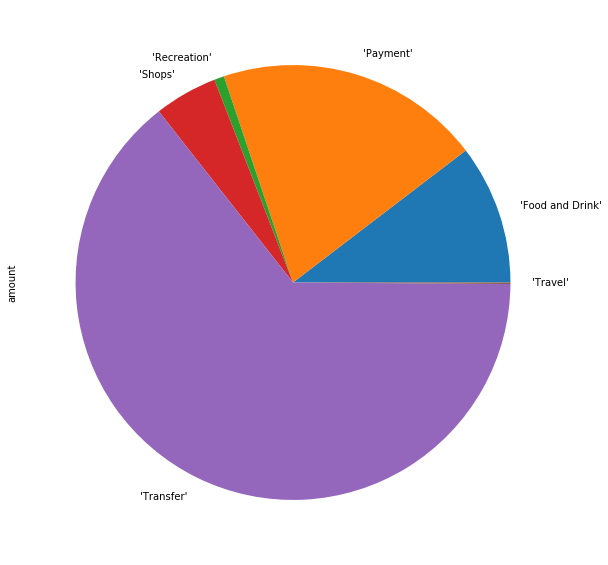

In [50]:
# Create a spending categories pie chart.
total_per_cat_type.plot(kind='pie', figsize = [10,10], subplots = True)

### Calculate the expenses per month

In [51]:
# Create a DataFrame with the total expenses
total_per_month = df.groupby('month')['amount'].sum()
# Display sample data
total_per_month

month
1     11145.24
2     10145.24
3     11145.24
4     10645.24
5      6560.41
11     3584.83
12    10645.24
Name: amount, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11dba4210>],
      dtype=object)

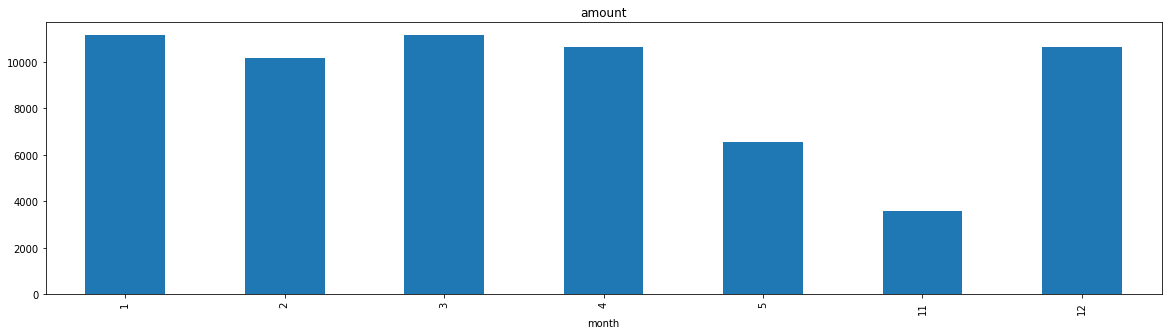

In [52]:
# Create a spending per month bar chart
total_per_month.plot(kind='bar', figsize = [20,5], subplots = True)